In [2]:
from sklearn.cluster import KMeans
import numpy as np
import os
import pandas as pd

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [3]:
event_prefix = 'event000001002'
hits, cells, particles, truth = load_event(os.path.join('train_100_events/', event_prefix))

particle particle_id    1.351104e+17
vx             9.222340e-03
vy            -1.809580e-02
vz            -5.714170e+00
px             3.659910e-01
py            -5.273450e-01
pz             4.603040e-01
q              1.000000e+00
nhits          1.900000e+01
Name: 2441, dtype: float64
p_traj             tx           ty          tz
19    0.009222    -0.018096   -5.714170
0    17.700800   -26.344299   17.044399
1    38.628201   -59.767700   45.464802
2    61.115002   -98.690498   77.888496
3    86.263496  -148.052002  117.755997
4    87.095802  -149.800003  119.149002
6   120.740997  -229.679993  181.662003
5   123.019997  -235.912994  186.460007
8   151.369003  -327.700989  256.006012
7   152.091995  -330.578003  258.154999
10  176.175003  -463.574005  356.278015
12  176.509995  -466.550995  358.460999
9   176.837997  -469.544006  360.648010
11  177.153000  -472.500000  362.808014
14  181.541000  -630.393982  477.993011
13  181.212997  -636.619995  482.535004
15  157.255997  -807.4929

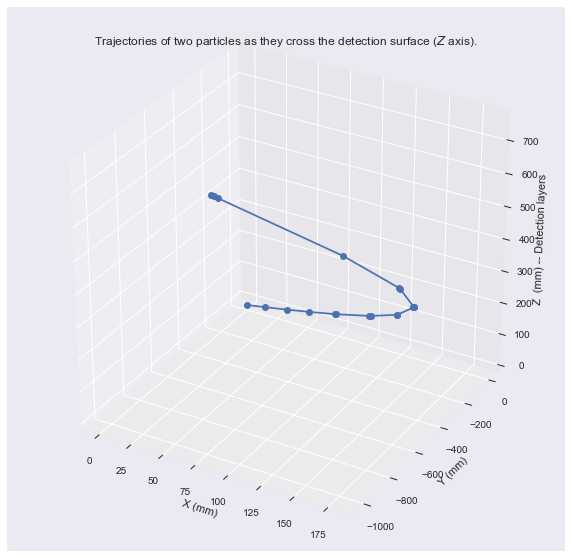

In [10]:
particle = particles.loc[particles.nhits == particles.nhits.max()].iloc[0]
particle2 = particles.loc[particles.nhits == particles.nhits.max()].iloc[1]
particle3 = particles.loc[particles.nhits == particles.nhits.max()].iloc[2]


# Get points where the same particle intersected subsequent layers of the observation material
p_traj_surface = truth[truth.particle_id == particle.particle_id][['tx', 'ty', 'tz']]
p_traj_surface2 = truth[truth.particle_id == particle2.particle_id][['tx', 'ty', 'tz']]
p_traj_surface3 = truth[truth.particle_id == particle3.particle_id][['tx', 'ty', 'tz']]


p_traj = (p_traj_surface
          .append({'tx': particle.vx, 'ty': particle.vy, 'tz': particle.vz}, ignore_index=True)
          .sort_values(by='tz'))
p_traj2 = (p_traj_surface2
          .append({'tx': particle2.vx, 'ty': particle2.vy, 'tz': particle2.vz}, ignore_index=True)
          .sort_values(by='tz'))

p_traj3 = (p_traj_surface3
          .append({'tx': particle3.vx, 'ty': particle3.vy, 'tz': particle3.vz}, ignore_index=True)
          .sort_values(by='tz'))


print("particle", particle)
print('p_traj', p_traj)
print("p_traj_surface",p_traj_surface)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    xs=p_traj.tx,
    ys=p_traj.ty,
    zs=p_traj.tz, marker='o')
# ax.plot(
#     xs=p_traj2.tx,
#     ys=p_traj2.ty,
#     zs=p_traj2.tz, marker='o')
# ax.plot(
#     xs=p_traj3.tx,
#     ys=p_traj3.ty,
#     zs=p_traj3.tz, marker='o')


ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z  (mm) -- Detection layers')
plt.title('Trajectories of two particles as they cross the detection surface ($Z$ axis).')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0).fit(p_traj)


In [11]:
labels = kmeans.labels_

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


In [17]:
centroids = kmeans.cluster_centers_

print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
            marker='x', s=169, linewidths=3)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

[[ 110.33646504 -248.4795417   192.29047029]
 [ 129.48533249 -854.43283081  647.26000977]]


TypeError: scatter() got multiple values for argument 's'

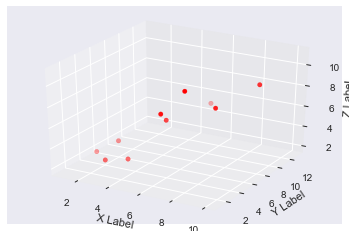

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [33]:
Test = kmeans.labels_
print(p_traj)
print(Test, Test_new)

            tx           ty          tz
19    0.009222    -0.018096   -5.714170
0    17.700800   -26.344299   17.044399
1    38.628201   -59.767700   45.464802
2    61.115002   -98.690498   77.888496
3    86.263496  -148.052002  117.755997
4    87.095802  -149.800003  119.149002
6   120.740997  -229.679993  181.662003
5   123.019997  -235.912994  186.460007
8   151.369003  -327.700989  256.006012
7   152.091995  -330.578003  258.154999
10  176.175003  -463.574005  356.278015
12  176.509995  -466.550995  358.460999
9   176.837997  -469.544006  360.648010
11  177.153000  -472.500000  362.808014
14  181.541000  -630.393982  477.993011
13  181.212997  -636.619995  482.535004
15  157.255997  -807.492981  608.325012
17   87.999100 -1012.270020  767.414001
16   85.123001 -1018.479980  772.479004
18   83.779900 -1021.340027  774.814026
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1] 977169.1878679605


20
20
14


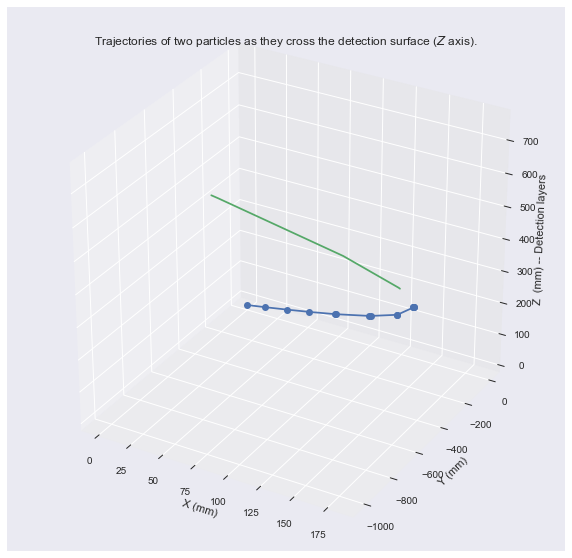

In [45]:
print(len(p_traj))
print(len(labels))

for i in range(len(labels)):
    if labels[i] > 0:
        print(i)
        break


#for i in range(len(labels))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    xs=p_traj.tx[:i],
    ys=p_traj.ty[:i],
    zs=p_traj.tz[:i], marker='o')
ax.plot(
    xs=p_traj.tx[i:],
    ys=p_traj.ty[i:],
    zs=p_traj.tz[i:], marker='x')
# ax.plot(
#     xs=p_traj2.tx,
#     ys=p_traj2.ty,
#     zs=p_traj2.tz, marker='o')
# ax.plot(
#     xs=p_traj3.tx,
#     ys=p_traj3.ty,
#     zs=p_traj3.tz, marker='o')


ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z  (mm) -- Detection layers')
plt.title('Trajectories of two particles as they cross the detection surface ($Z$ axis).')
plt.show()

In [43]:
print(i)

14
